In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


display(HTML("<style>.output_wrapper, .output {height:auto !important; max-height:500px;}</style>"))


file_path = r"C:\Users\yaros\Desktop\Labs Python\En_In.xls"
energy = pd.read_excel(file_path, skiprows=17)
energy.drop(energy.columns[[0, 1]], axis=1, inplace=True)


energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']


energy['Energy Supply'] = energy['Energy Supply'] * 1_000_000


pd.set_option('future.no_silent_downcasting', True)
energy = energy.replace("...", np.nan)


country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_renames)


energy['Country'] = energy['Country'].str.replace(r"\(.*\)|\d+", "", regex=True)
energy['Country'] = energy['Country'].str.replace(r"\s+$", "", regex=True)


In [31]:

file_path = r"C:\Users\yaros\Desktop\Labs Python\gpd.csv"
gdp = pd.read_csv(file_path, skiprows=4)


gdp_country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country Name'] = gdp['Country Name'].replace(gdp_country_renames)


gdp_years = gdp[['Country Name'] + [str(year) for year in range(2006, 2016)]]


In [33]:

scimago = pd.read_excel(r'C:\Users\yaros\Desktop\Labs Python\scimagojr.xlsx')


top_15_countries = scimago[scimago['Rank'] <= 15]['Country']


energy = energy[energy['Country'].isin(top_15_countries)]
gdp_years = gdp_years[gdp_years['Country Name'].isin(top_15_countries)]
scimago = scimago[scimago['Country'].isin(top_15_countries)]


gdp_years.rename(columns={'Country Name': 'Country'}, inplace=True)


merged_data = pd.merge(scimago, energy, on='Country')
merged_data = pd.merge(merged_data, gdp_years, on='Country')


print(merged_data.head())


merged_data.set_index('Country', inplace=True)


   Rank             Country  Documents  Citable documents  Citations  \
0     1               China     127050             126767     597237   
1     3               Japan      30504              30287     223024   
2     5  Russian Federation      18534              18301      34266   
3     6              Canada      17899              17620     215003   
4     7             Germany      17027              16831     140566   

   Self-citations  Citations per document  H index Energy Supply  \
0          411683                    4.70      138  127191000000   
1           61554                    7.31      134   18984000000   
2           12422                    1.85       57   30709000000   
3           40930                   12.01      149   10431000000   
4           27426                    8.26      126   13261000000   

  Energy Supply per Capita  ...          2006          2007          2008  \
0                       93  ...  3.992331e+12  4.559041e+12  4.997775e+12   
1   

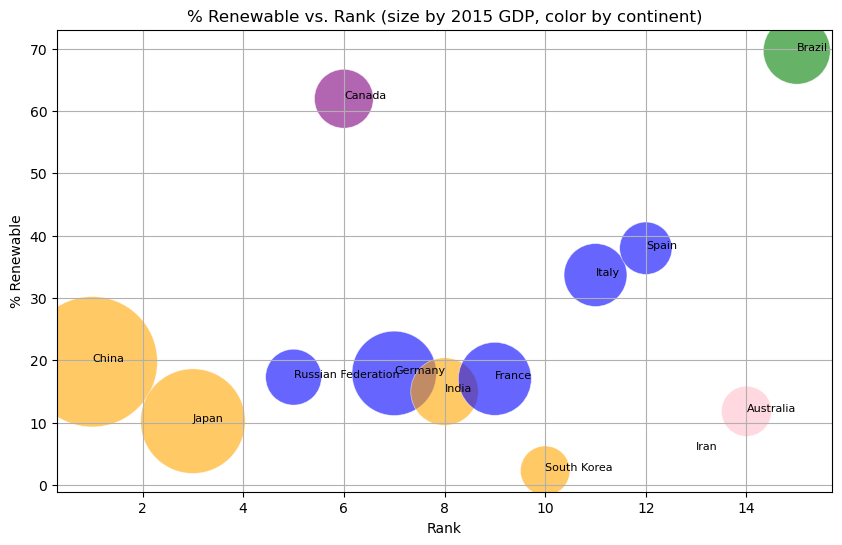

In [41]:
import matplotlib.pyplot as plt

def bubble_chart(df):
    
    continent_colors = {
        'Asia': 'orange', 
        'Europe': 'blue', 
        'North America': 'purple', 
        'South America': 'green', 
        'Australia': 'pink'
    }
    
    
    df['Color'] = df['Continent'].map(continent_colors)
    
 
    plt.figure(figsize=(10, 6))
    
  
    scatter = plt.scatter(
        x=df['Rank'], 
        y=df['% Renewable'], 
        s=df['2015'] / 1e9,
        c=df['Color'], 
        alpha=0.6, 
        edgecolor='w', 
        linewidth=0.5
    )
    
   
    for i in range(len(df)):
        plt.text(
            x=df['Rank'].iloc[i], 
            y=df['% Renewable'].iloc[i], 
            s=df.index[i], 
            fontsize=8
        )
    
  
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('% Renewable vs. Rank (size by 2015 GDP, color by continent)')
    plt.grid(True)
    plt.show()


bubble_chart(merged_data)


In [35]:

def calculate_avg_gdp_last_10_years(dataframe):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    avg_gdp = dataframe[gdp_columns].mean(axis=1).sort_values(ascending=False)
    return avg_gdp


average_gdp = calculate_avg_gdp_last_10_years(merged_data)
print(average_gdp)


def gdp_change_for_5th_country(avg_gdp):
    fifth_country = avg_gdp.index[4]
    gdp_2006 = merged_data.loc[fifth_country, '2006']
    gdp_2015 = merged_data.loc[fifth_country, '2015']
    gdp_diff = gdp_2015 - gdp_2006
    return (fifth_country, gdp_diff)


fifth_country_gdp_change = gdp_change_for_5th_country(average_gdp)
print(fifth_country_gdp_change)


def find_max_renewable_country(dataframe):
    max_renewable_idx = dataframe['% Renewable'].idxmax()
    max_renewable_value = dataframe.loc[max_renewable_idx, '% Renewable']
    return (max_renewable_idx, max_renewable_value)


max_renewable_info = find_max_renewable_country(merged_data)
print(max_renewable_info)


def calculate_population_sixth_country(dataframe):
    dataframe['Estimated Population'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita']
    sorted_population = dataframe['Estimated Population'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    sixth_country_population = sorted_population.iloc[5]
    return (sixth_country, sixth_country_population)


population_of_sixth_country = calculate_population_sixth_country(merged_data)
print(population_of_sixth_country)


def correlation_citations_energy(dataframe):
    dataframe['Citations per Person'] = dataframe['Citations'] / dataframe['Estimated Population']
    correlation_value = dataframe['Citations per Person'].corr(dataframe['Energy Supply per Capita'])
    return correlation_value


citations_energy_correlation = correlation_citations_energy(merged_data)
print(citations_energy_correlation)


Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64
('Brazil', 474343725980.5698)
('Brazil', 69.64803)
('Germany', 80369696.96969697)
0.7485600772321211


In [37]:

def countries_above_renewable_median(data):
    renewable_median = data['% Renewable'].median()
    data['Renewable Above Median'] = (data['% Renewable'] >= renewable_median).astype(int)

    if 'Rank' in data.columns:
        sorted_result = data[data['Renewable Above Median'] == 1][['Renewable Above Median', 'Rank']].sort_values('Rank')
        return sorted_result
    else:
        print("Колонка 'Rank' отсутствует в данных.")
        return None


renewable_above_median_result = countries_above_renewable_median(merged_data)
print(renewable_above_median_result)


def calculate_population_by_continent(data):
    continent_mapping = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 'India': 'Asia',
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America',
        'Germany': 'Europe', 'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe',
        'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 'Brazil': 'South America'
    }
    

    data['Continent'] = data.index.to_series().map(continent_mapping)
    
 
    population_summary = data.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])
    
    
    population_summary['sum'] = population_summary['sum'].round(3)
    population_summary['mean'] = population_summary['mean'].round(3)
    population_summary['std'] = population_summary['std'].round(3)
    
    return population_summary


continent_population_stats = calculate_population_by_continent(merged_data)
print(continent_population_stats)


                    Renewable Above Median  Rank
Country                                         
China                                    1     1
Russian Federation                       1     5
Canada                                   1     6
Germany                                  1     7
Italy                                    1    11
Spain                                    1    12
Brazil                                   1    15
               size               sum              mean           std
Continent                                                            
Asia              5   2898666386.6106   579733277.32212  6.790979e+08
Australia         1   23316017.316017   23316017.316017           NaN
Europe            5  394058699.474436   78811739.894887  3.813228e+07
North America     1   35239864.864865   35239864.864865           NaN
South America     1  205915254.237288  205915254.237288           NaN
